In [11]:
import matplotlib.pyplot as plt
import numpy as np

En esta libreta, veremos varios ejemplos de algoritmos voraces (*greedy* en inglés), y cómo demostrar formalmente que efectivamente son correctos.

### Algoritmo de Dijkstra
Puedes encontrar el camino más corto desde un nodo a todos los otros nodos del grafo, generando un árbol del camino más corto.


"¿Cuál es el camino más corto para viajar desde Rotterdam a Groningen? Es el algoritmo para el camino más corto, el cual diseñé en aproximadamente 20 minutos" - entrevista (https://dl.acm.org/doi/pdf/10.1145/1787234.1787249)


https://www.freecodecamp.org/espanol/news/algoritmo-de-la-ruta-mas-corta-de-dijkstra-introduccion-grafica/

# Ejemplos

## Cintas magnéticas

El sistema de archivado más utilizado para respaldar datos de manera robusta es el de *cintas magnéticas*. Para leer un archivo de una cinta, el lector debe de pasar por todos los archivos que aparecen delante de él, lo cual toma bastante tiempo.

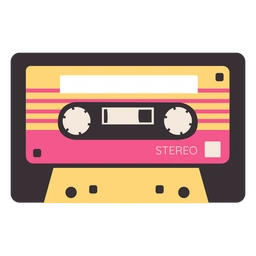

Sea $L$ un arreglo con los *largos* de cada uno de los archivos, con la $i$-ésima entrada correspondiendo al largo del archivo $i$. Si los archivos están almacenados en orden desde el 1 hasta el $n$, el costo de accesar el $k$-ésimo archivo es:

$$
C(k) = \sum_{i=1}^kL[i]
$$

Si asumimos que todos los archivos tienen la misma probabilidad de lectura, el valor esperado del costo es:

$$
\mathbb{E}\left[C\right] = \sum_{k=1}^n\frac{C(k)}{n} = \frac{1}{n}\sum_{k=1}^n\sum_{i=1}^kL[i]
$$

### Reordenamiento

Si cambiamos el orden de los archivos en la cinta, cambiamos el costo de acceso: algunos archivos se vuelven más baratos de leer, pero otros se vuelven más caros. Diferentes órdenes resultan en distintos valores esperados de costo. 

Ahora, denotemos con $\pi(i)$ el índice del archivo en la $i$-ésima posición de la cinta. Por ejemplo, si el archivo 3 está en la primera posición, tenemos que $\pi(1) = 3$. Con esta notación, el valor esperado de una cierta permutación ${\Pi}$ es:

$$
\mathbb{E}[C(\Pi)] = \frac{1}{n}\sum_{k=1}^n\sum_{i=1}^kL[\pi(i)]
$$

### Solución óptima

¿Qué orden debemos de usar si queremos minimizar el valor esperado del costo? La respuesta intuitiva es bastante clara: ordenamos los archivos del más pequeño al más grande. Demostramos esto de manera formal:

**Lema:** El valor esperado del costo se minimiza cuando $L[\pi(i)]<L[\pi(i+1)]$ para toda $i$.

**Demostración:** Supongamos que se cumple $L[\pi(i)] > L[\pi(i+1)]$ para algún $i$. Por simplicidad, definimos $a=\pi(i)$ y $b=\pi(i+1)$. 

Si cambiamos los archivos $a$ y $b$, el costo de accesar a $a$ se incrementa por $L[b]$, y el costo de accesar a $b$ se decrementa por $L[a]$. Entonces, el valor esperado del costo cambia por:

$$
\Delta C = \frac{L[b]-L[a]}{n}
$$

Pero recordemos que habíamos asumido que $L[a] > L[b]$, i.e. $L[b] - L[a]<0$. Por lo tanto, al intercambiar $a$ y $b$, se reduce el costo esperado, de lo cual se sigue que el ordenamiento óptimo es el propuesto.

## Cintas magnéticas con frecuencias

Ahora, supongamos que aparte de la lista de largos $L$, tenemos una lista $F$ que nos dice cuántas veces accederemos cada uno de los elementos. El costo *total* de accesar todos los archivos en la cinta es:

$$
\begin{align}
    \Sigma[C(\Pi)] &= \sum_{k=1}^n\left(F[\pi(k)]C(k)\right) \\
    &= \sum_{k=1}^n\left(F[\pi(k)]\sum_{i=1}^kL[\pi(i)]\right) \\
    &= \sum_{k=1}^n\sum_{i=1}^kF[\pi(k)]L[\pi(i)]
\end{align}
$$

¿Cómo ordenamos los archivos de modo que el costo total se minimice?

Si todos los archivos se accesan con la misma frecuencia, el problema se reduce al del ejemplo anterior, por lo cual sólo hay que reordenarlos en orden ascendente de tamaño. Por otro lado, si tienen el mismo tamaño, pero distintas frecuencias, por un argumento perfectamente análogo, llegamos a que deben de ordenarse de forma **descendente** en frecuencia.

Sin embargo, ¿qué pasa si tanto el tamaño como la frecuencia varían? En este caso, proponemos que debemos de ordenarlas de manera ascendente, de acuerdo a la razón:

$$
Q(\pi(i)) = \frac{L[\pi(i)]}{F[\pi(i)]}
$$

Lo demostramos de manera formal:

**Lema:** El costo total se minimiza cuando $Q(\pi(i)) \leq Q(\pi(i+1))$ para toda $i$.

**Demostración:** Supongamos que $Q(\pi(i)) > Q(\pi(i+1))$ para alguna $i$. Sean $a$ y $b$ como las definimos previamente. Si intercambiamos los archivos $a$ y $b$, el costo de accesar $a$ se incrementa por $L[b]$, y el costo de accesar a $b$ se decrementa por $L[a]$. Este intercambio altera el costo total por $L[b]F[a]-L[a]F[b]$, pero este cambio es una mejora, ya que:

$$
\frac{L[a]}{F[a]}>\frac{L[b]}{F[b]}\Leftrightarrow L[b]F[a]-L[a]F[b]<0
$$

Por lo tanto, el intercambiar $a$ y $b$ disminuye el costo total, de lo cual se sigue que el ordenamiento óptimo es el propuesto.

## Clases

Estamos empezando un nuevo semestre y queremos armar nuestro horario, dado un conjunto de $n$ clases posibles. Para esto, tenemos dos listas: $S$, que tiene los tiempos de inicio de cada clase, y $F$, que tiene los tiempos de final. Para graduarnos lo más rápido posible, queremos inscribirnos a tantas clases como sea posible, de modo que ninguna se empalme.

Este problema tiene una solución recursiva relativamente simple. Tomamos la primera clase de la lista, y consideramos dos posibilidades: la inscribimos o no la inscribimos. Para ambos casos, pasamos a la segunda clase, y hacemos lo mismo de manera recursiva. 

Con memoización y otros trucos de programación dinámica, podemos lograr que este algoritmo tenga una complejidad de $O(n^3)$, lo cual no es muy bueno.

---

¿Cómo podemos mejorar esto? Empecemos notando que, intuitivamente, nos gustaría que la primera clase en nuestro horario terminase lo más pronto posible, ya que eso nos dejaría más tiempo para inscribir más clases. De esto, se sigue el siguiente algoritmo voraz: 

1. Ordenamos las clases en orden ascendente, de acuerdo a su tiempo de término.
2. Iteramos sobre la lista ordenada:
    1. Si encontramos una clase que no se empalma con las clases en nuestro horario, la añadimos al horario.

Afirmamos que este algoritmo produce **un** horario maximal. Nótese que no estamos diciendo que este horario es el único posible.

Escribiéndolo en Python:

In [12]:
l = ["a", "b", "d", "e", "c"]
np.argsort(l)

array([0, 1, 4, 2, 3])

In [13]:
def make_schedule(S, F):
    idx = np.argsort(F)
    out = []
    for i in idx:
        if len(out) == 0:
            out.append(i)
        else:
            last_idx = out[-1]
            if S[i] > F[last_idx]:
                out.append(i)
    return out

Por ejemplo, si tenemos las siguientes clases:

* 7 a 15
* 1 a 8
* 1 a 4
* 5 a 8
* 9 a 10
* 3 a 7
* 6 a 8

Graficando:

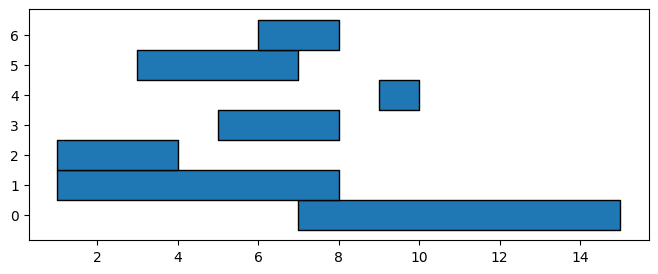

In [14]:
S = [7, 1, 1, 5, 9, 3, 6]
F = [15, 8, 4, 8, 10, 7, 8]

fig, ax = plt.subplots(figsize=(8, 3))
for i in range(len(S)):
    width = F[i] - S[i]
    ax.broken_barh([(S[i], width)], (i-0.5, 1), edgecolor="k")
plt.show()

Una posible solución es:

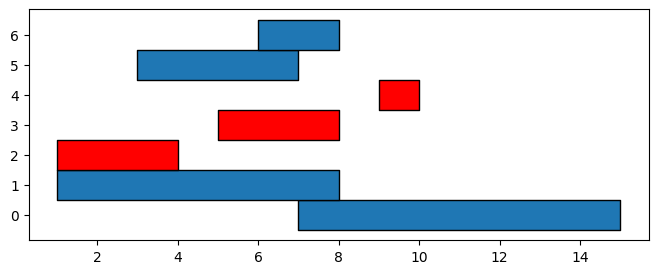

In [15]:
out = make_schedule(S, F)

fig, ax = plt.subplots(figsize=(8, 3))
for i in range(len(S)):
    width = F[i] - S[i]
    fc = "red" if i in out else "C0"
    ax.broken_barh([(S[i], width)], (i-0.5, 1), edgecolor="k", facecolor=fc)
plt.show()

Para demostrar que este algoritmo es correcto, primero demostramos el siguiente lema:

**Lema:** Al menos un horario maximal incluye la clase que acaba primero.

**Demostración:** Sea $f$ la clase que acaba primero. Supongamos que tenemos un horario maximal $X$ que no incluye a $f$. Sea $g$ la clase en $X$ que acaba primero. Como $f$ termina antes que $g$, $f$ no se empalma con ninguna de las clases en $X\setminus \{g\}$. Por lo tanto, el horario $X' = X\cup \{f\}\setminus \{g\}$ no tiene conflictos, y dado que tiene el mismo número de elementos que $X$, se concluye que también es maximal.

Ahora, demostramos que nuestro algoritmo es correcto por inducción:

**Demostración:** Sea $f$ la clase que termina primero, y $A$ el subconjunto de las clases que empiezan después de que $f$ acaba. Por el lema anterior, sabemos que algún horario óptimo contiene a $f$, entonces, si hacemos una lista de todos los horarios que contienen a $f$, y obtenemos el más grande, habremos encontrado un óptimo.

El mejor horario que incluye a $f$ debe de contener un sub-horario óptimo para las clases que no se empalman con $f$, es decir, un horario óptimo para $A$. Entonces, por inducción, el algoritmo genera un horario óptimo.

## Monedas

Consideremos monedas con valores $1, 2, 5, 10$. Dado un entero positivo $n$, ¿cómo podemos encontrar el menor número de monedas con el que podemos sumar $n$?

Un algoritmo voraz sería en cada momento, considerar el mayor valor que es menor o igual a $n$, y usar esa moneda, continuando con este proceso con el valor que resulta de restarle a $n$ el valor de la moneda usada.

Veamos una implementación de esto:

In [16]:
def min_coins(n, coins):
    max_idx = len(coins) - 1
    count = [0] * len(coins)
    while n > 0:
        count[max_idx] += n//coins[max_idx]
        n -= count[max_idx] * coins[max_idx]
        max_idx -= 1
    return sum(count), count

In [17]:
coins = [1, 2, 5, 10]

print(min_coins(100, coins))
print(min_coins(27, coins))
print(min_coins(75, coins))

(10, [0, 0, 0, 10])
(4, [0, 1, 1, 2])
(8, [0, 0, 1, 7])


Para demostrar que es correcto, primero demostramos el siguiente lema:

**Lema:** Si nosotros sabemos que el algoritmo no usó ninguna moneda de $10$, entonces a lo mucho cambiamos $9$ pesos.

**Demostración:** Primero, notemos que nuestro algoritmo utiliza a lo mucho una moneda de $1$, ya que de otra manera podría haberla sustituido por una de $2$. Por el mismo argumento, no puede usar tres monedas de $2$, ya que podría haberlas cambiado por una de $5$ y una de $1$. 

Por lo tanto, la suma máxima que podemos formar es:

$$ 1 \cdot 1 + 2 \cdot 2 + 1 \cdot 5 = 10 $$

Pero si hubiésemos llegado a 10, podríamos haber cambiado las monedas por una de $10$. Por lo tanto, tenemos que detenernos en $10-1=9$. 

---

Ahora, probamos la correctitud del algoritmo por inducción. 

* **Caso base:** Consideramos todos los enteros del 1 al 10, para los cuales es fácil ver que nuestro algoritmo sí nos da el menor número de monedas posible. 
* **H.I.** El algoritmo regresa la menor cantidad de monedas posible para todo $k \leq n$.
* $n+1$: Como ya vimos que es cierto para todo entero positivo menor o igual a $10$, podemos suponer que $11 \leq n+1$. 

Por el lema, dado que $n+1>10$, sabemos que el algoritmo utiliza al menos una moneda de $10$. Usándola, tenemos ahora $n+1-10$. Esta suma es menor que $n+1$, por lo cual por H.I. sabemos que el algoritmo nos dará una solución óptima. Finalmente, si añadimos la moneda de $10$ del principio a esta solución, tendremos una solución óptima para $n+1$.

---

Con esto hemos probado que el algoritmo greedy para esta distribución de monedas nos dice el menor número de monedas posible, ¿será cierto para cualquier destribución de monedas?

Como es de esperarse, no. Hay diferentes cosas que pueden suceder para que el algoritmo no nos dé el menor número de monedas necesario.
*   Puede suceder que exista $n$ tal que no se pueda formar con las monedas disponibles. Por ejemplo, si $\{3, 7\}$ son las posibles denominaciones de las monedas, no se puede formar el número $11$.
*   También puede suceder que sí exista forma de llegar al número deseado, pero que nuestro algoritmo no nos diga correctamente el menor número de monedas necesarias, un ejemplo de esto es tener monedas con denominaciones $\{1, 4, 7, 8, 10\}$ y queremos formar el número $15$, siguiendo el algoritmo greedy se seleccionarán una moneda de $10$, otra de $4$ y otra de $1$, sin embargo, es posible usar menos monedas, seleccionando una de $8$ y otra de $7$.

¿Se puede dar un algoritmo que siempre funcione independientemente de las denominaciones de las monedas? En efecto se puede, usando programación dinámica es posible garantizar encontrar la respuesta independientemente de las denominaciones (¿cómo hacemos esto?). Esto ilustra algo que es también bastante usual: si un algoritmo greedy no funciona, se puede encontrar una forma de resolver el problema usando programación dinámica, esto no es una regla pero suele ser bastante común.


# Ejercicios

## Ejercicio 1

Reescribe el algoritmo para el problema de las monedas cuando tienes un número limitado de monedas de cada denominación.

Se realizaron las siguientes modificaciones:

1. Sabemos que el bucle `while` de la linea 4 se ejecutará mientras `n>0`, sin embargo, ahora existe la posibilidad de que no podamos cubrir el monto `n` con las monedas disponibles. Entonces, se agregó la condición de que `mx_idx>=0` para salir del ciclo cuando se hayan recorrido todas las denominaciones de monedas.

2. Se agregó el cálculo de `max_per_coin`, la cual contiene la cantidad máxima que se puede usar de monedas de una denominación en particular. Para ello, se toma el mínimo entre `limits[max_idx]` y `n // coins[max_idx]`

3. Se decrementa `n` de acuerdo al número máximo de monedas permitidas en la denominación actual. 

4. Se verifica que, si no se pudo cubrir el monto `n`, la función retorna `None`.

In [18]:
def min_coins_limited(n: int, coins: list[int], limits: list[int]) -> tuple[int, list[int]]:
    """
    Parameters:
    -----------
    n: int
        Valor a alcanzar con las monedas
    coins: list[int]
        Lista de valores de las monedas disponibles ordenadas de menor a mayor
    limits: list[int]
        Lista de límites de uso de cada moneda
    Returns:
    --------
    tuple[int, list[int]]
        Número total de monedas usadas y desglose de monedas usadas
    """
    max_idx = len(coins) - 1
    count = [0] * len(coins)
    while n > 0 and max_idx >= 0: # Se agrega la condicion de max_idx >= 0 por si no se logra cubrir el monto n
        max_per_coin = min(n // coins[max_idx], limits[max_idx]) # Toma en cuenta el límite de uso de la moneda
        count[max_idx] = max_per_coin
        n -= max_per_coin * coins[max_idx]
        max_idx -= 1
    # Si n es mayor a 0, entonces no se logró cubrir el monto con las monedas disponibles
    if n > 0:
        return None, count 
    return sum(count), count

Ejemplos

In [ ]:
coins = [1, 2, 5, 10]
limits = [5, 2, 1, 3]

test = [7, 14, 23, 28, 50]
limited_results = {n: min_coins_limited(n, coins, limits) for n in test}
limited_results

{7: (2, [0, 1, 1, 0]),
 14: (3, [0, 2, 0, 1]),
 23: (4, [1, 1, 0, 2]),
 28: (5, [1, 1, 1, 2]),
 50: (None, [5, 2, 1, 3])}

- $n=7$: Se necesita 1 moneda de 5 y 1 de 2. Total: 2 monedas
- $n=14$: Se necesita 1 moneda de 10 y 2 de 2. Total: 3 monedas
- $n=23$: Se necesitan 2 monedas de 10, 1 de 2 y 1 de 1. Total: 4 monedas
- $n=28$: Se necesitan 2 moneda de 10, 1 de 5, 1 de 2 y 1 de 2. Total: 5 monedas
- $n=50$: No se puede cubrir ese monto con las cantidades de monedas disponibles.

## Ejercicio 2

* Tienes un conjunto de $n$ sustancias en forma de líquido. La sustancia $i$ tiene un valor total $v_i$, y un peso total $w_i$. 
* Tienes una mochila que puede aguantar un peso máximo $z$. 
* Puedes escoger cuánto de cada sustancia llevar (i.e., puedes escoger no llevar la sustancia $i$, o llevar solo la mitad, o un tercio, etc.) El valor de la parte que llevas es proporcional (i.e., si escoges $\frac{w_i}{2}$ de la sustancia $i$, el valor correspondiente será $\frac{v_i}{2}$)

Diseña un algoritmo voraz que escoja las sustancias tal que el valor total se maximice. A este problema se le conoce como el **problema de la mochila continuo** (o **fraccional**).

La idea principal consiste en obtener el valor de cada sustancia por unidad de peso. Es decir el cociente $\frac{v_i}{w_i}$ para todas las sustancias. A partir de estas proporciones, es conveniente ordenar las sustancias de mayor a menor según su valor por unidad de peso. Luego, tenemos que agregar las sustancias a la mochila de la siguiente manera:

Se recorre la lista ordenada de proporciones en un ciclo, empezando por el mayor:
- Si el peso actual `weight` no excede el peso soportado por la mochila `z`, agregamos la sustancia completa (i.e. `z >= weight`). Le restamos a `z` el peso de la sustancia que acabamos de agregar a la mochila, y sumamos en la variable `total_value` el valor de la sustancia que metimos a la mochila.

- En otro caso (no podemos tomar toda la sustancia), tomamos una fracción de ella. Tomamos las `z` unidades de peso aún disponibles en la mochila y agregamos su valor a `total_value`. Salimos del ciclo, dado que ya llenamos la mochila.

In [30]:
def knapsack_continuous(W: list[int], V: list[int], z:int) -> float:
    """
    Parameters:
    -----------
    W: list[int]
        Lista de pesos de los objetos
    V: list[int]
        Lista de valores de los objetos
    z: int
        Peso máximo que puede llevar la mochila
    Returns:
    --------
    float
        Valor máximo que se puede llevar en la mochila
    """
    proportion = sorted([(V[i] / W[i], W[i], V[i]) for i in range(len(W))], reverse=True)
    print(proportion)
    total_value = 0
    for value_per_weight, weight, value in proportion:
        if z >= weight:
            # Tomamos toda la sustancia
            z -= weight
            total_value += value
        else:
            # Tomamos una fracción de la sustancia
            total_value += value_per_weight * z
            break  # Ya alcanzamos el límite de peso
    return total_value

Ejemplos:

In [ ]:
W = [10, 20, 30]
V = [60, 100, 120]
z = 50
knapsack_continuous(W, V, z)

[(6.0, 10, 60), (5.0, 20, 100), (4.0, 30, 120)]


240.0

1. Primera sustancia: Su peso es 10, menor que 10. La tomamos completa.
    - Capacidad restante = 50 - 10 = 40
    - Valor total = 60
2. Segunda sustancia: Su peso es 20, menor que 40. La tomamos completa.
    - Capacidad restante = 40 - 20 = 20
    - Valor total = 60 + 100 = 160
3. Tercera sustancia: Su peso es 30, mayor que 20. Tomamos la fracción correspondiente.
    - Valor de la fracción = 20 $\times$ 4 = 80
    - Valor total = 160 + 80 = 240

In [ ]:
W = [5, 10, 15]
V = [50, 60, 90]
z = 20
knapsack_continuous(W, V, z)

[(10.0, 5, 50), (6.0, 15, 90), (6.0, 10, 60)]


140.0

1. Primera sustancia: Su peso es 5, menor que 20. LA tomamos completa.
    - Capacidad restante = 20 - 5 = 15
    - Valor total = 50
2. Segunda sustancia: Su peso es 10, menor que 15. La tomamos completa.
    - Capacidad restante = 15 - 10 = 5
    - Valor total = 50 + 60 = 110
3. Tercera sustancia: Su peso es 15, mayor que 5. Tomamos la fracción correspondiente.
    - Valor de la fracción = 6 $\times$ 5 = 30
    - Valor total = 110 + 30 = 140

Éxito :)